HW 2

Этот набор данных содержит информацию о подержанных автомобилях.

- Car_Name - Название автомобиля
- Year - год в котором купил машину предыдущий владелец
- Selling_Price - цена продажи машины сейчас
- Present_Price - предыдущая цена покупки
- Kms_Driven - сколько километров проехала машина
- Fuel_Type - тип используемого топлива
- Seller_Type - тип продавца
- Transmission - тип коробки передач
- Owner - количество владельцев автомобиля до текущего хозяина

Целевой переменной считать - Selling_Price.

1. После загрузки необходимо проанализировать существующие признаки.
2. Определите какие признаки являются числовыми, а какие категориальными (кодом!) Выведите список одних и других.
3. Используйте стратегию валидации Holdout. Постройте линейную регрессию на числовых признаках. Оцените качество работы с помощью метрик MSE и MAE.
4. Проанализируйте важность признаков без библиотеки eli5.
5. Сравните результат вашего анализа с результатов eli5.
6. Добавьте категориальные признаки при помощи метода sklearn.preprocessing.OneHotEncoder. [Документация](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) + [Пример использования](https://www.dmitrymakarov.ru/data-analysis/encoding-10/#10-klass-onehotencoder)
7. Переобучите модель. Также проанализируйте важность признаков, что изменилось? А как изменились метрики?
8. Добавьте регуляризацию (3 типа). Как меняется важность признаков? Как изменяются метрики?
9. Добавьте [Learning Curve](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html) для одной из моделей. [Визуализируйте результат!](https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py)

In [2]:
pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=f5af4bdf0ddb76ed2c6b013b040446503e4cfc3f77ddadeece7a1c359a166307
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [119]:
# Импорты
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import eli5

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import linear_model
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import learning_curve, LearningCurveDisplay

In [4]:
# Загрузка данных
sharing_url = "https://drive.google.com/file/d/1qeae-8oAfQnULTs838ROpupXLvMNwtiO/view?usp=sharing"
download_url = "https://drive.google.com/uc?id=" + sharing_url.split("/")[-2]

df = pd.read_csv(download_url)

In [5]:
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# Категориальные призанки

In [7]:
df.Car_Name.unique(), df.Fuel_Type.unique(), df.Seller_Type.unique(), df.Transmission.unique(), df.Owner.unique()

(array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
        's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
        '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
        'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
        'camry', 'land cruiser', 'Royal Enfield Thunder 500',
        'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
        'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
        'Royal Enfield Thunder 350', 'KTM 390 Duke ',
        'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
        'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
        'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
        'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
        'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
        'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
        'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
        'TVS A

# _НЕ_Категориальные призанки

In [8]:
df.Year.unique()[:5], df.Selling_Price.unique()[:5], df.Present_Price.unique()[:5], df.Kms_Driven.unique()[:5]

(array([2014, 2013, 2017, 2011, 2018]),
 array([3.35, 4.75, 7.25, 2.85, 4.6 ]),
 array([5.59, 9.54, 9.85, 4.15, 6.87]),
 array([27000, 43000,  6900,  5200, 42450]))

In [9]:
numeric_features = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']]
numeric_features

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
0,2014,3.35,5.59,27000,0
1,2013,4.75,9.54,43000,0
2,2017,7.25,9.85,6900,0
3,2011,2.85,4.15,5200,0
4,2014,4.60,6.87,42450,0
...,...,...,...,...,...
296,2016,9.50,11.60,33988,0
297,2015,4.00,5.90,60000,0
298,2009,3.35,11.00,87934,0
299,2017,11.50,12.50,9000,0


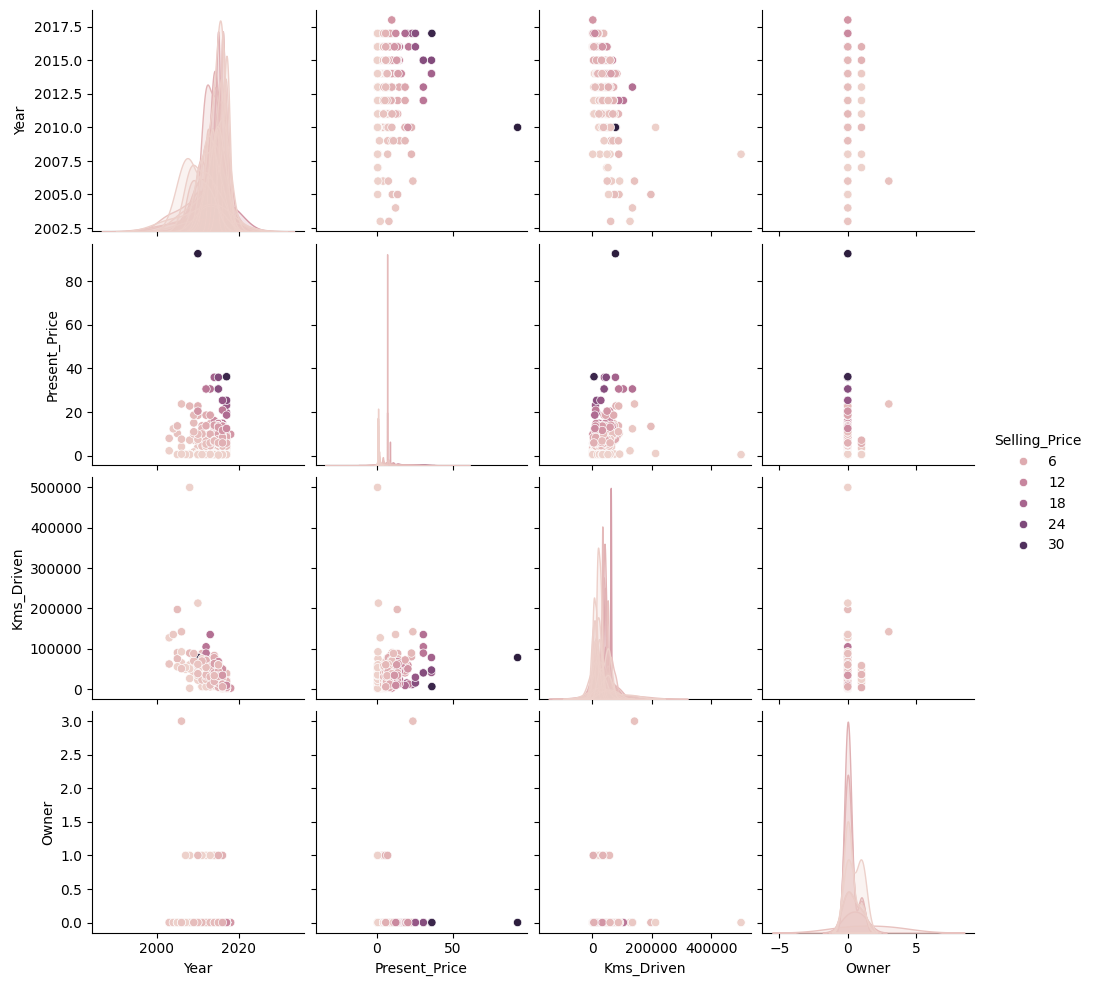

In [10]:
sns.pairplot(numeric_features, hue='Selling_Price', kind='scatter')

In [11]:
numeric_features.corr(method='pearson')

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


#  HOLDOUT

In [12]:
y = numeric_features['Selling_Price']
X = numeric_features.copy().drop(['Selling_Price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_v, X_val, y_train_v, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [13]:
# Метрики на валидации
reg = LinearRegression().fit(X_train_v, y_train_v)

val_preds = reg.predict(X_val)
mean_squared_error(y_val, val_preds), mean_absolute_error(y_val, val_preds)

(2.7784570674800544, 1.1887206921328652)

In [14]:
# Метрики на тесте
test_preds = reg.predict(X_test)
mean_squared_error(y_test, test_preds), mean_absolute_error(y_test, test_preds)

(4.174816661462684, 1.4125436515579772)

In [15]:
for i, name in enumerate(list(X.columns)):
  print(f'feature: {name} has {reg.coef_[i]}')


feature: Year has 1.2392142517276585
feature: Present_Price has 4.528840096637622
feature: Kms_Driven has -0.02965027145576471
feature: Owner has -0.30148095194594293


In [16]:
eli5.show_weights(reg, feature_names=X.columns.tolist())

Weight?,Feature
+4.648,<BIAS>
+4.529,Present_Price
+1.239,Year
-0.030,Kms_Driven
-0.301,Owner


# Значения из coef_ и eli5 одинаковы!

# ONE-HOT

In [71]:
df_onehot = df.copy()

onehotencoder = OneHotEncoder(sparse = False)

In [72]:
df_onehot['Fuel_Type'] = df_onehot['Fuel_Type'].map({'CNG': 0, 'Petrol': 1, 'Diesel' : 2})
df_onehot['Seller_Type'] = df_onehot['Seller_Type'].map({'Individual': 0, 'Dealer': 1})
df_onehot['Transmission'] = df_onehot['Transmission'].map({'Automatic': 0, 'Manual': 1})
encoded_df = pd.DataFrame(onehotencoder.fit_transform(df_onehot[['Car_Name']]))
encoded_df

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,96,97
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
encoded_df.columns = onehotencoder.get_feature_names_out()
df_onehot = df_onehot.join(encoded_df)
df_onehot = df_onehot.drop('Car_Name', axis = 1)
df_onehot

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Name_800,Car_Name_Activa 3g,...,Car_Name_land cruiser,Car_Name_omni,Car_Name_ritz,Car_Name_s cross,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent
0,2014,3.35,5.59,27000,1,1,1,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2013,4.75,9.54,43000,2,1,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2017,7.25,9.85,6900,1,1,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2011,2.85,4.15,5200,1,1,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2014,4.60,6.87,42450,2,1,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,2,1,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
297,2015,4.00,5.90,60000,1,1,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
298,2009,3.35,11.00,87934,1,1,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
299,2017,11.50,12.50,9000,2,1,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
y = df_onehot['Selling_Price']
X = df_onehot.copy().drop(['Selling_Price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_v, X_val, y_train_v, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [85]:
# Метрики на валидации
reg = LinearRegression().fit(X_train_v, y_train_v)

val_preds = reg.predict(X_val)
mean_squared_error(y_val, val_preds), mean_absolute_error(y_val, val_preds)

(7.50631402575186e+28, 116016389797738.88)

In [86]:
# Метрики на тесте
test_preds = reg.predict(X_test)
mean_squared_error(y_test, test_preds), mean_absolute_error(y_test, test_preds)

(3.6090847321276302e+25, 2015819725957.5835)

In [87]:
eli5.show_weights(reg, feature_names=X.columns.tolist())

# Регуляризация

In [90]:
# Метрики на валидации
reg = linear_model.Lasso().fit(X_train_v, y_train_v)

val_preds = reg.predict(X_val)
mean_squared_error(y_val, val_preds), mean_absolute_error(y_val, val_preds)

(5.34662405726662, 1.498738403296289)

In [91]:
# Метрики на тесте
test_preds = reg.predict(X_test)
mean_squared_error(y_test, test_preds), mean_absolute_error(y_test, test_preds)

(7.222237261224883, 1.9061769517026106)

In [92]:
eli5.show_weights(reg, feature_names=X.columns.tolist())

Weight?,Feature
+4.623,<BIAS>
+3.441,Present_Price
+0.308,Year
+0.103,Fuel_Type
+0.076,Seller_Type


In [93]:
# Метрики на валидации
reg = linear_model.Ridge().fit(X_train_v, y_train_v)

val_preds = reg.predict(X_val)
mean_squared_error(y_val, val_preds), mean_absolute_error(y_val, val_preds)

(11.595368289782742, 1.554471261641252)

In [94]:
# Метрики на тесте
test_preds = reg.predict(X_test)
mean_squared_error(y_test, test_preds), mean_absolute_error(y_test, test_preds)

(2.378715959276714, 1.1098526872624983)

In [95]:
eli5.show_weights(reg, feature_names=X.columns.tolist())

Weight?,Feature
+4.698,<BIAS>
+4.429,Present_Price
+1.324,Year
+1.136,Car_Name_Activa 3g
+0.522,Car_Name_innova
+0.467,Fuel_Type
+0.387,Car_Name_800
+0.293,Car_Name_creta
+0.279,Seller_Type
+0.275,Car_Name_Honda Karizma


In [100]:
# Метрики на валидации
reg = ElasticNet()
reg = reg.fit(X_train_v, y_train_v)

val_preds = reg.predict(X_val)
mean_squared_error(y_val, val_preds), mean_absolute_error(y_val, val_preds)

(6.08479187750281, 1.629528953541012)

In [101]:
# Метрики на тесте
test_preds = reg.predict(X_test)
mean_squared_error(y_test, test_preds), mean_absolute_error(y_test, test_preds)

(6.407944417142539, 1.674489066535153)

In [102]:
eli5.show_weights(reg, feature_names=X.columns.tolist())

Weight?,Feature
+4.647,<BIAS>
+1.952,Present_Price
+0.674,Seller_Type
+0.544,Fuel_Type
+0.538,Car_Name_fortuner
+0.478,Year
+0.271,Car_Name_innova
+0.185,Car_Name_land cruiser
+0.048,Car_Name_creta
-0.280,Transmission


# learning_curve

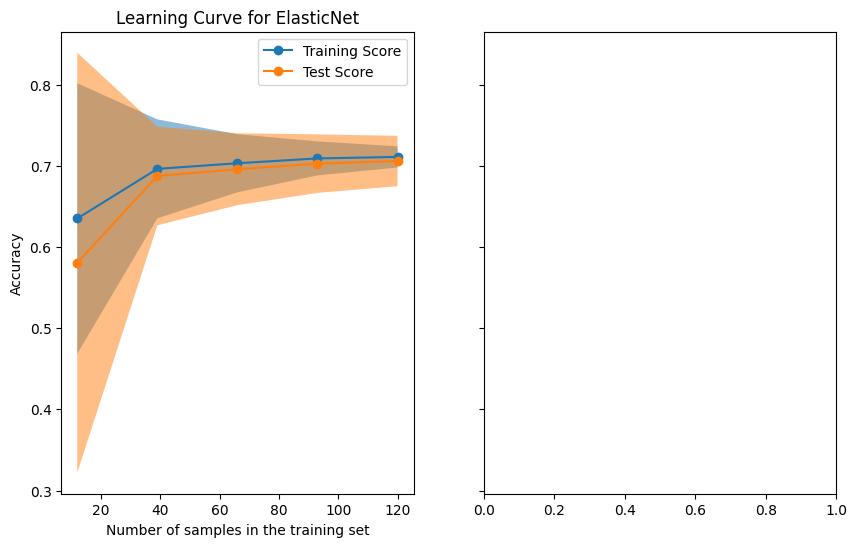

In [124]:
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([reg]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")